<a href="https://colab.research.google.com/github/HaruToy/ComputerVision/blob/master/Final%20Project/YOLO-v4/yolo_v4_(epoch50%2C%20lr-0.001%2C%20%EC%82%AC%EC%A7%84%EB%B9%84%EA%B5%90%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


# Set up YOLOv4 Environment

In [5]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 398, done.
remote: Total 398 (delta 0), reused 0 (delta 0), pack-reused 398
Receiving objects: 100% (398/398), 926.53 KiB | 14.48 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [ ]:
%cd /content/drive/MyDrive/pytorch-YOLOv4
!pip install -r requirements.txt
# This restarts the runtime--ignore any error messages
import os
os.kill(os.getpid(), 9)

/content/drive/MyDrive/pytorch-YOLOv4
     |████████████████████████████████| 20.2MB 1.3MB/s 
     |████████████████████████████████| 753.4MB 23kB/s 
     |████████████████████████████████| 12.6MB 262kB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 122kB 59.0MB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.3 which is incompatible.
ERROR: kapre 0.3.5 has requirement numpy>=1.18.5, but you'll have numpy 1.18.2 which is incompatible.
ERROR: datascience 0.10.6 has requi

In [9]:
import numpy, torch, matplotlib,tqdm,easydict,PIL,tensorboardX

In [10]:
# download yolov4 weights that have already been converted to PyTorch
%cd /content/drive/MyDrive/pytorch-YOLOv4
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

/content/drive/MyDrive/pytorch-YOLOv4
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/drive/MyDrive/pytorch-YOLOv4/yolov4.conv.137.pth
170MB [00:03, 45.6MB/s]


In [11]:
%cd /content/drive/MyDrive/pytorch-YOLOv4
# REPLACE this link with your Roboflow dataset (export as YOLOv4 PyTorch format)
!curl -L "https://app.roboflow.com/ds/12WEccA7gO?key=6QRTSbMM5R" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/drive/MyDrive/pytorch-YOLOv4
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0    629      0  0:00:01  0:00:01 --:--:--   629
100 30.1M  100 30.1M    0     0  14.6M      0  0:00:02  0:00:02 --:--:-- 82.3M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: train/
 extracting: train/0_jpg.rf.e6d04345d6f6beecdca28644eed0c8cd.jpg  
 extracting: train/1000_jpg.rf.b0180e0b13ee8d7af5c8f0f5350a8fd6.jpg  
 extracting: train/1001_jpg.rf.a370d39b5606b932a66f0f07eee5387e.jpg  
 extracting: train/1002_jpg.rf.44ba7898c6952d39829b36fb3fb158d7.jpg  
 extracting: train/1003_jpg.rf.aaf67759e368778ab184707006f70459.jpg  
 extracting: train/1004_jpg.rf.e3615fca67d0725c78ae4e7e37060861.jpg  
 extracting: train/1005_jpg.rf.ccd0fed1609fdce4f087d80d48ed50cc.jpg  
 extracting: train/1006_jpg.rf.9a79f7853ed1ffa36d180e39a5baec41.jpg  
 extract

In [12]:
!curl -L "https://app.roboflow.com/ds/WfU1jx66AY?key=HhS4g3WZ27" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1445      0 --:--:-- --:--:-- --:--:--  1445
100 7037k  100 7037k    0     0  7181k      0 --:--:-- --:--:-- --:--:-- 80.1M
Archive:  roboflow.zip
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: READEME.robofloe2.txt
 extracting: READEME.robofloe2.txt   
   creating: test/
 extracting: test/1140_jpg.rf.977cfb9a9abb34ef43229001c0a3ec12.jpg  
 extracting: test/1141_jpg.rf.83d173d4101d674270e5c077e6ab3952.jpg  
 extracting: test/1142_jpg.rf.3c23c1a2b61fd02cc32333eea98a132b.jpg  
 extracting: test/1143_jpg.rf.6614b197ee40e982610e7e79ad30180e.jpg  
 extracting: test/1144_jpg.rf.d1729f571926707f14621dae9a6565db.jpg  
 extracting: test/1145_jpg.rf.bd954400a82b47946ed20d5cb7fac0d5.jpg  
 extracting: test/1146_jpg.rf.8d0c5b699784c7191ee75c199e677fde.jpg  
 extracting: test/11

In [13]:
!pwd

/content/drive/My Drive/pytorch-YOLOv4


In [15]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
# %mkdir data1
%cp test/_annotations.txt data/test.txt
%cp test/*.jpg train/

In [17]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [18]:
print(num_classes)

4


In [22]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python /content/drive/MyDrive/pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained /content/drive/MyDrive/pytorch-YOLOv4/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2021-06-09_13-04-43.txt
2021-06-09 13:04:43,227 train.py[line:435] INFO: Using device cuda
2021-06-09 13:04:46,667 train.py[line:282] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   948
        Validation size: 239
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 4
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|        | 0/948 [00:00<?, ?img/s]/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/50:   4%| | 38/948 [00:10<02:49,  5.35img//usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler,

In [23]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch22.pth	Yolov4_epoch34.pth  Yolov4_epoch46.pth
Yolov4_epoch11.pth  Yolov4_epoch23.pth	Yolov4_epoch35.pth  Yolov4_epoch47.pth
Yolov4_epoch12.pth  Yolov4_epoch24.pth	Yolov4_epoch36.pth  Yolov4_epoch48.pth
Yolov4_epoch13.pth  Yolov4_epoch25.pth	Yolov4_epoch37.pth  Yolov4_epoch49.pth
Yolov4_epoch14.pth  Yolov4_epoch26.pth	Yolov4_epoch38.pth  Yolov4_epoch4.pth
Yolov4_epoch15.pth  Yolov4_epoch27.pth	Yolov4_epoch39.pth  Yolov4_epoch50.pth
Yolov4_epoch16.pth  Yolov4_epoch28.pth	Yolov4_epoch3.pth   Yolov4_epoch5.pth
Yolov4_epoch17.pth  Yolov4_epoch29.pth	Yolov4_epoch40.pth  Yolov4_epoch6.pth
Yolov4_epoch18.pth  Yolov4_epoch2.pth	Yolov4_epoch41.pth  Yolov4_epoch7.pth
Yolov4_epoch19.pth  Yolov4_epoch30.pth	Yolov4_epoch42.pth  Yolov4_epoch8.pth
Yolov4_epoch1.pth   Yolov4_epoch31.pth	Yolov4_epoch43.pth  Yolov4_epoch9.pth
Yolov4_epoch20.pth  Yolov4_epoch32.pth	Yolov4_epoch44.pth
Yolov4_epoch21.pth  Yolov4_epoch33.pth	Yolov4_epoch45.pth


In [53]:
#choose random test image
import os
from IPython.display import Image
test_images = [f for f in os.listdir('test2') if f.endswith('.jpg')]
print(len(test_images))
# for i in test_images:
#   img_path = "test2/" + i;
#   !python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt
#   Image('predictions.jpg')

9


In [54]:
img_path = "test2/" + test_images[0];
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

2: 0.999967
2: 0.999999
save plot results to predictions.jpg


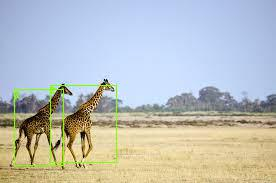

In [55]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [56]:
img_path = "test2/" + test_images[1];
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

/content/pytorch-YOLOv4/tool/utils.py:16: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(-x) + 1.)
0: 0.999977
0: 0.999953
save plot results to predictions.jpg


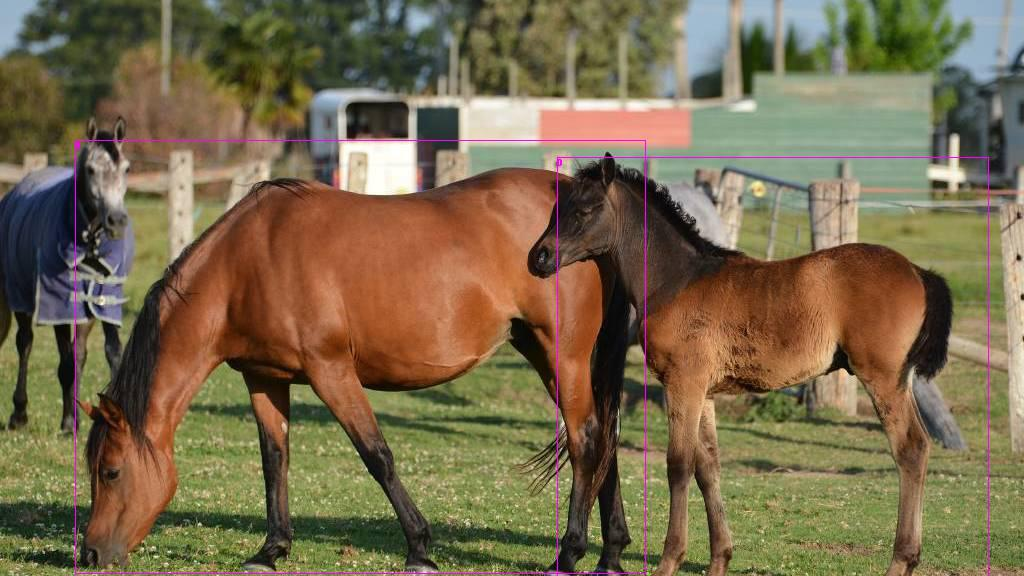

In [57]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [58]:
img_path = "test2/" + test_images[2];
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

/content/pytorch-YOLOv4/tool/utils.py:16: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(-x) + 1.)
0: 0.897335
save plot results to predictions.jpg


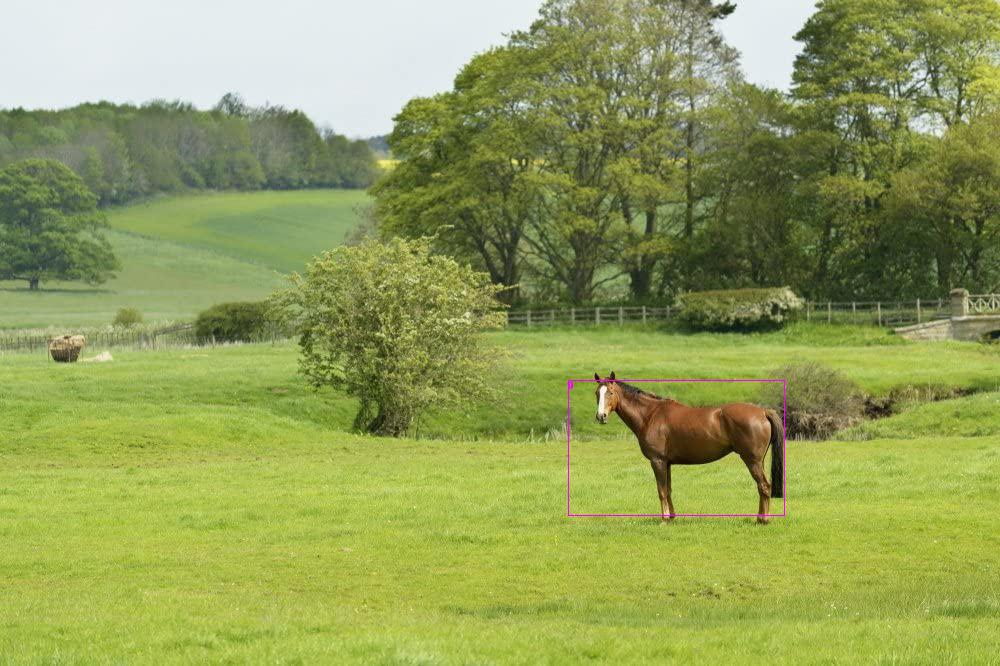

In [59]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [60]:
img_path = "test2/" + test_images[3];
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

1: 0.999961
2: 1.000000
save plot results to predictions.jpg


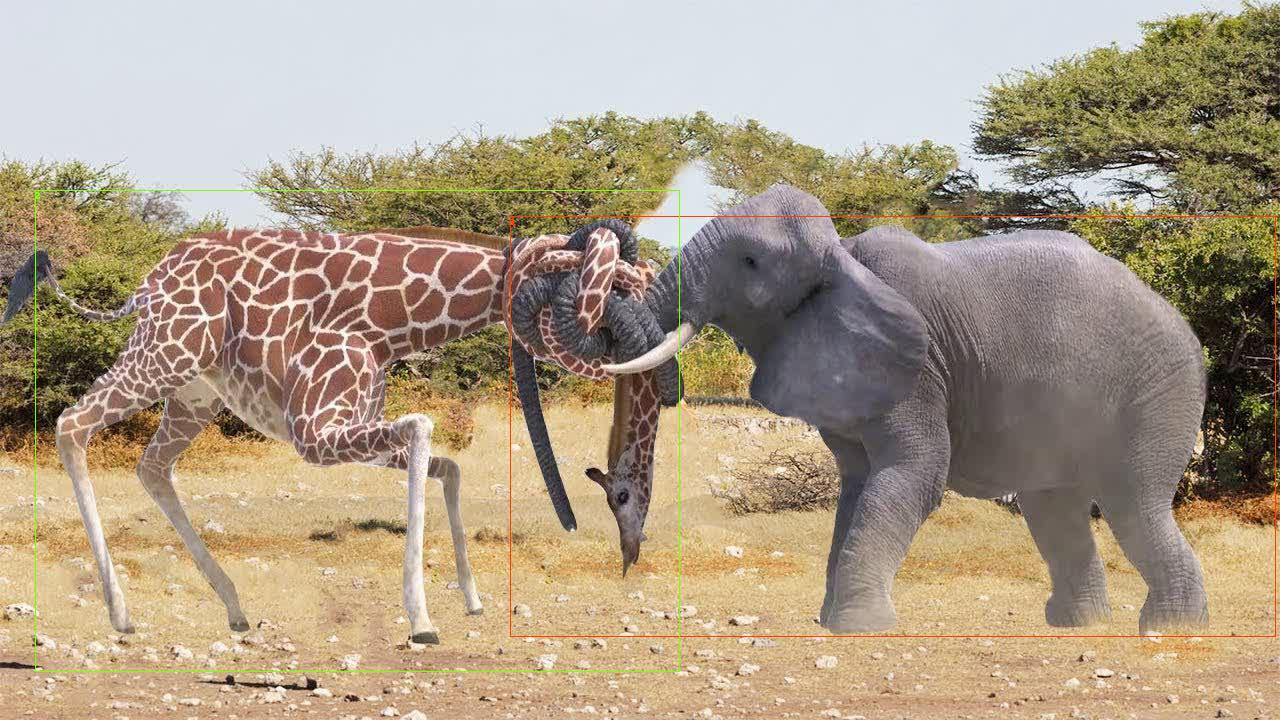

In [61]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [62]:
img_path = "test2/" + test_images[4];
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

/content/pytorch-YOLOv4/tool/utils.py:16: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(-x) + 1.)
3: 0.999992
3: 0.999961
1: 0.997709
3: 0.994185
3: 0.991666
save plot results to predictions.jpg


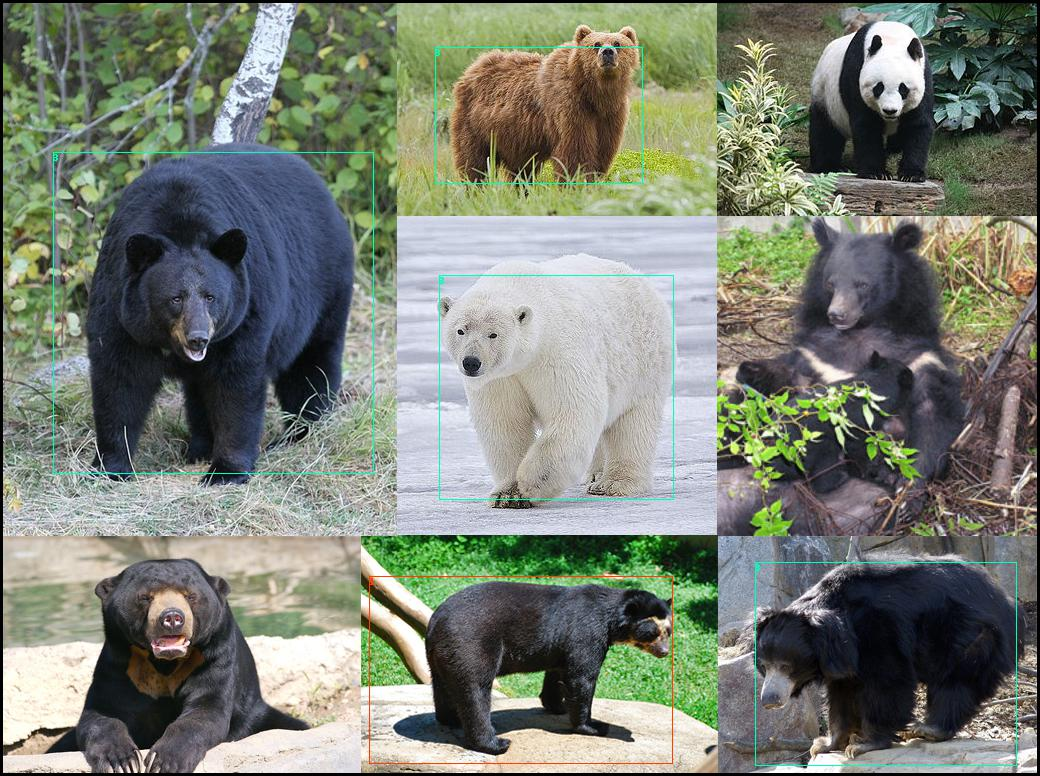

In [63]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [64]:
img_path = "test2/" + test_images[5];
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

1: 0.999992
1: 0.999988
1: 1.000000
1: 0.999990
1: 0.999792
save plot results to predictions.jpg


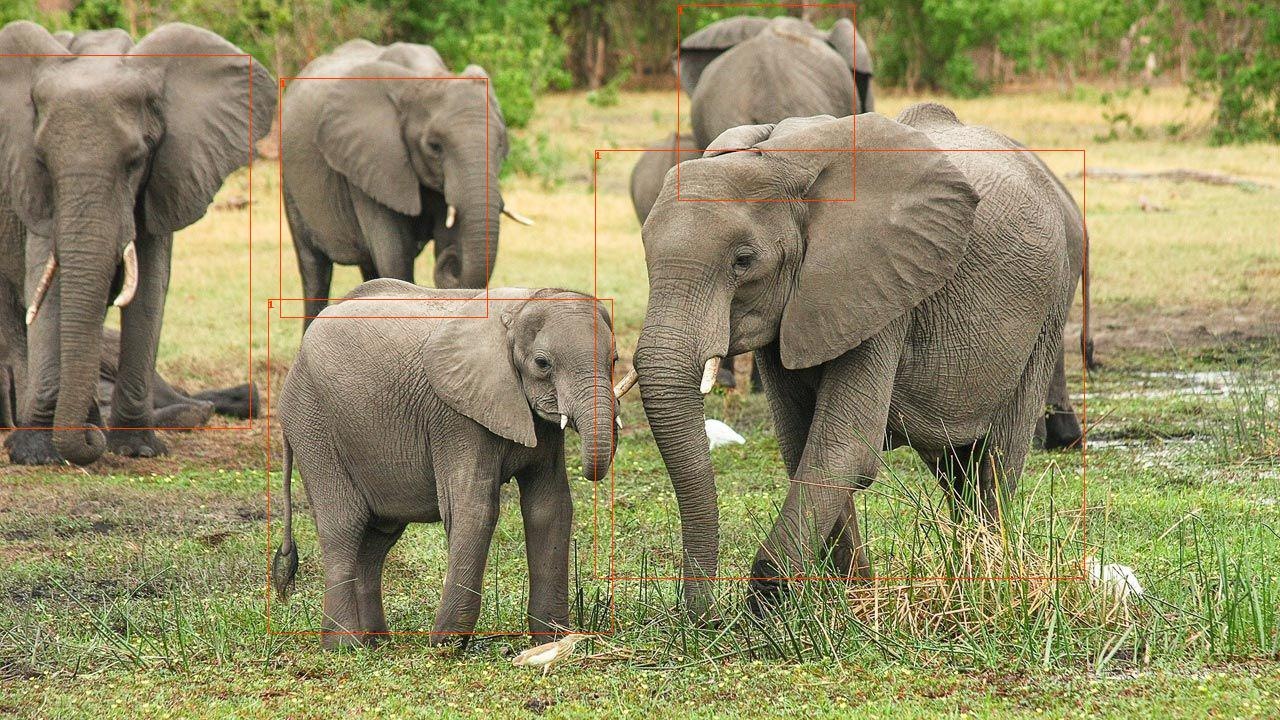

In [65]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [66]:
img_path = "test2/" + test_images[6];
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

/content/pytorch-YOLOv4/tool/utils.py:16: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(-x) + 1.)
save plot results to predictions.jpg


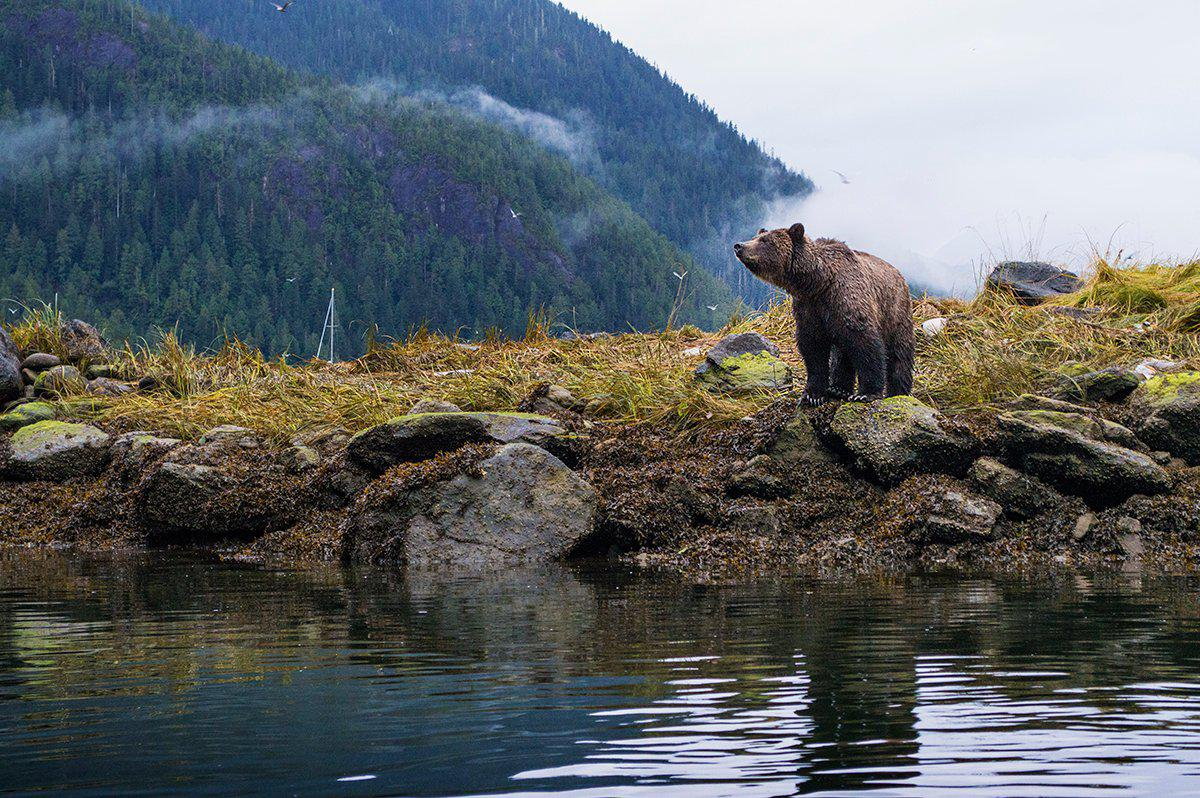

In [67]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [68]:
img_path = "test2/" + test_images[7];
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

1: 0.999983
1: 0.999967
save plot results to predictions.jpg


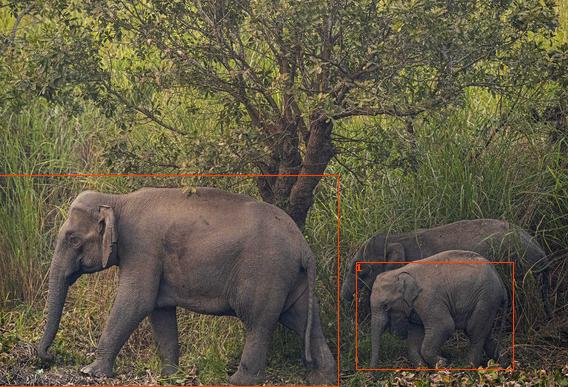

In [69]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [70]:
img_path = "test2/" + test_images[8];
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

0: 0.999831
save plot results to predictions.jpg


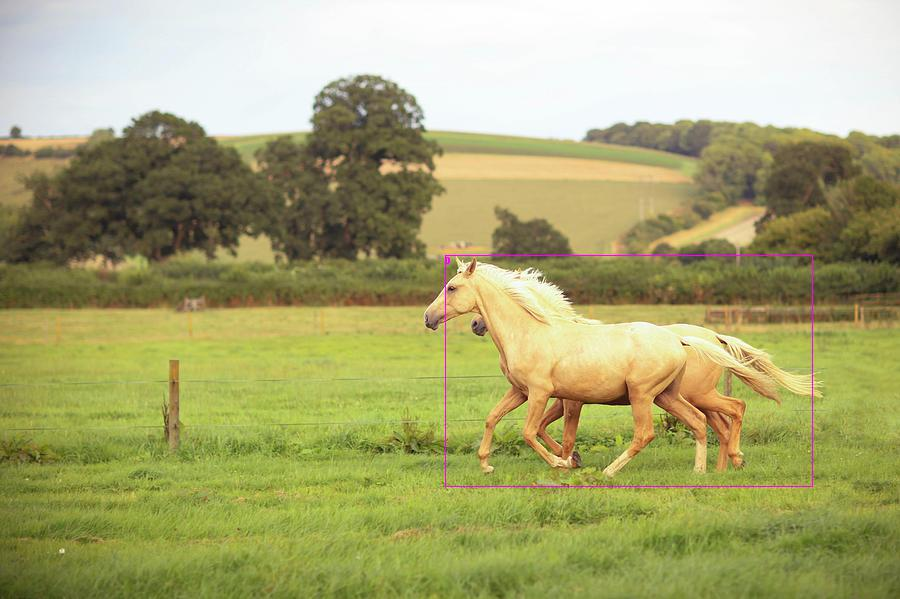

In [71]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')